In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [34]:
print(tf.__version__) #version check

2.3.0


# 1. Train your first model

In [35]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # data load
x_train, x_test = x_train / 255.0, x_test / 255.0 # data preprocessing

In [36]:
print(x_train.shape, y_train.shape) #check your data shape

(60000, 28, 28) (60000,)


In [37]:
#keras in tensorflow gives easy ways to build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary() #After building your model, you can see summarization of the architecture

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1408 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9768
313/313 - 0s - loss: 0.0747 - accuracy: 0.9783


[0.0746995359659195, 0.9782999753952026]

# 2. Move to Convolutional Neural Network!

In [41]:
# 생략하면 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 에서
# You have data-shape problem!
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [42]:
your_cnn = tf.keras.models.Sequential()
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

your_cnn.add(tf.keras.layers.Flatten())
your_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
your_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [43]:
your_cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_______________________________________________

In [44]:
your_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
your_cnn.fit(x_train, y_train, epochs=5) 

your_cnn.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1143 - accuracy: 0.9655
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0396 - accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0135 - accuracy: 0.9956
313/313 - 2s - loss: 0.0350 - accuracy: 0.9892


[0.03496328368782997, 0.9891999959945679]

In [46]:
# Image shape must be (N, W, H, C) when you fetch this image into Convolutional layer. 
# It's an agreed coding style with TensorFlow!

x_train = tf.expand_dims(x_train, axis = 3)
x_test = tf.expand_dims(x_test, axis=3)

#### 혹은 이런 방법으로
x_train = x_train.reshape(60000,28,28,1)  
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
print(x_train.shape, y_train.shape) #check your data shape

In [ ]:
your_cnn.fit(x_train, y_train, epochs=5) 

your_cnn.evaluate(x_test,  y_test, verbose=2)

# you can see model parameters from layers

In [47]:
print(your_cnn.layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff18517d860>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff18517dda0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff18517df28>, <tensorflow.python.keras.layers.core.Flatten object at 0x7ff1836e3ef0>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff1836e3dd8>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff182e76da0>]


In [48]:
first_layer = your_cnn.layers[0]

In [49]:
print(first_layer)

In [50]:
print(first_layer.get_weights()[0].shape)
print(first_layer.get_weights()[1].shape)

(3, 3, 1, 32)
(32,)


In [51]:
first_layer.get_weights()[0][:,:,0,0].shape

(3, 3)

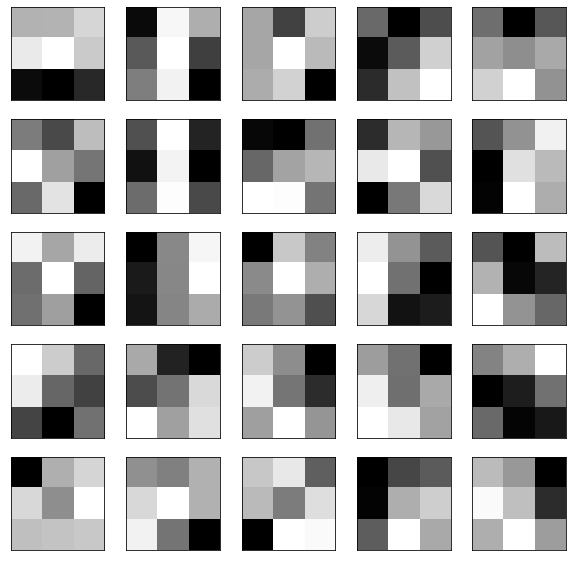

In [52]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(first_layer.get_weights()[0][:,:,0,i], cmap='gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()